# Desafío 2
Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

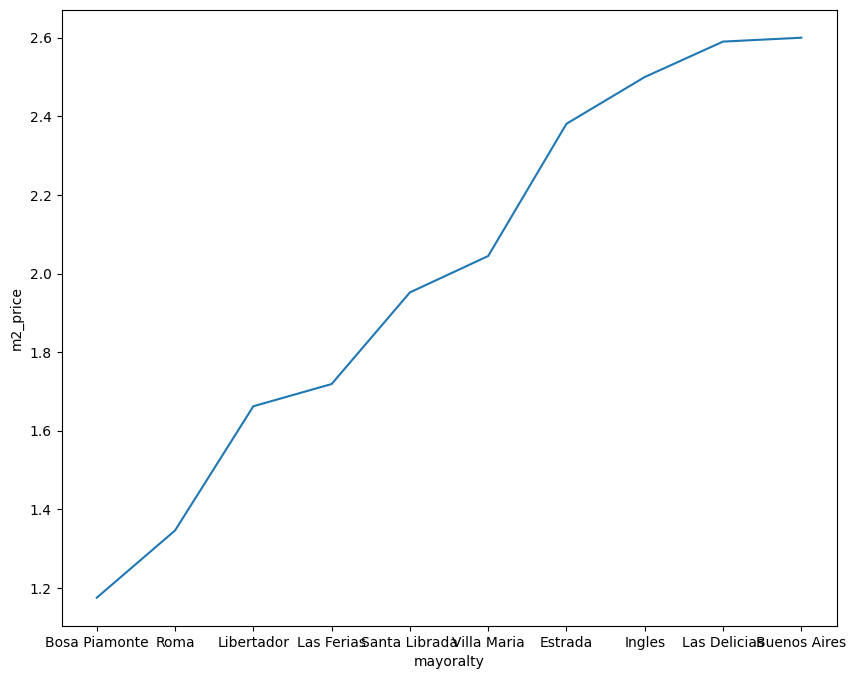

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( '../database/inmuebles_bogota.csv' )
col = {
    'Tipo': 'type',
    'Descripcion':'description',
    'Habitaciones':'bedrooms',
    'Baños':'bathrooms',
    'Área':'area',
    'Barrio':'mayoralty',
    'UPZ':'suburb',
    'Valor':'value'
}
df = df.rename( columns = col )
value = df['value'].str.split( expand = True )
df['currency'] = value[0]
df['price'] = value[1]
df['price'] = df['price'].str.replace( '.', '', regex = True )
df['price_K'] = df['price'].astype( 'float' ) / 1000000
pd.set_option( 'display.precision', 2 )
pd.set_option( 'display.float_format', lambda x: '%.2f' % x )

df['m2_price'] = df['price_K'] / df['area']

m2_by_mayoralty = df.groupby(['mayoralty'])['m2_price'].mean().sort_values( ascending = True)
plt.figure( figsize = ( 10, 8 ) )
m2_graph = sns.lineplot(m2_by_mayoralty.head(10))
plt.show()